In [80]:
# Let’s clean our bank dataset!
import pandas as pd

# Load the dataset (as of May 30, 2025, 01:42 AM IST)
df = pd.read_csv('BankLiquidityRiskDetection.csv')


In [36]:

# Print column names for debugging
print("Dataset columns:", df.columns.tolist())

# Check initial size
print("Original shape:", df.shape)

# Remove duplicates
print("Removing duplicates...")
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# Check for missing values
print("Checking for missing values...")
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# Verify no missing values
print("Missing values after filling:\n", df.isnull().sum()[df.isnull().sum() > 0])


Dataset columns: ['Unnamed: 0', 'REPORTINGDATE', 'INSTITUTIONCODE', '01_CURR_ACC', '02_TIME_DEPOSIT', '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS', '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE', '08_CHEQUES_ISSUED', '09_PAY_ORDERS', '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS', '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC', '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ', '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING', '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES', '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES', 'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE', 'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA', 'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans', 'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions', 'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 'DR', 'IBCM', 'GDP', 'INF', 'EWL_LIQUIDITY RATING', 'MLA', 'MLA_CLASS2', 

In [37]:

# Drop irrelevant columns
print("Dropping unnecessary columns...")
drop_cols = ['REPORTINGDATE', 'XX_MLA_CLASS2', 'MLA_CLASS2']
df = df.drop(columns=(col for col in drop_cols if col in df.columns))

# Save cleaned data
print("Saving cleaned data...")
df.to_csv('cleaned_bank_data.csv', index=False)
print("Cleaned shape:", df.shape)


Dropping unnecessary columns...
Saving cleaned data...
Cleaned shape: (20878, 48)


In [38]:

# Let’s prepare the data!
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load cleaned data
print("Loading cleaned_bank_data.csv...")
df = pd.read_csv('cleaned_bank_data.csv')

# Print columns for debugging
print("Cleaned dataset columns:", df.columns.tolist())


Loading cleaned_bank_data.csv...
Cleaned dataset columns: ['Unnamed: 0', 'INSTITUTIONCODE', '01_CURR_ACC', '02_TIME_DEPOSIT', '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS', '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE', '08_CHEQUES_ISSUED', '09_PAY_ORDERS', '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS', '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC', '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ', '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING', '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES', '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES', 'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE', 'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA', 'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans', 'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions', 'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 'DR', 'IBCM', 'GDP', 'INF', 'EWL_LIQUIDITY RATING

In [39]:

# Split into features (X) and target (y)
print("Splitting features and target...")
X = df.drop(columns=['EWL_LIQUIDITY RATING'])
y = df['EWL_LIQUIDITY RATING']


Splitting features and target...


In [40]:

# Define categorical column
cat_cols = ['INSTITUTIONCODE'] if 'INSTITUTIONCODE' in X.columns else []
# Define numerical columns (exclude categorical and ensure they exist)
num_cols = [col for col in X.columns if col not in cat_cols]

# Verify columns
missing_cols = [col for col in num_cols + cat_cols if col not in X.columns]
if missing_cols:
    print("Warning: These columns are missing:", missing_cols)
    num_cols = [col for col in num_cols if col in X.columns]
    cat_cols = [col for col in cat_cols if col in X.columns]

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Numerical columns: ['Unnamed: 0', '01_CURR_ACC', '02_TIME_DEPOSIT', '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS', '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE', '08_CHEQUES_ISSUED', '09_PAY_ORDERS', '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS', '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC', '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ', '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING', '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES', '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES', 'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE', 'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA', 'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans', 'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions', 'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 'DR', 'IBCM', 'GDP', 'INF', 'MLA']
Categorical columns: ['INSTITUTIONCODE']


In [41]:

# Create preprocessing pipeline
print("Setting up preprocessing...")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])


Setting up preprocessing...


In [42]:

# Split data: 70% train, 15% validation, 15% test
print("Splitting into train, validation, test...")
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42  # 0.1765 = 15/(100-15)
)

# Check shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Splitting into train, validation, test...
Train shape: (14613, 47) (14613,)
Validation shape: (3133, 47) (3133,)
Test shape: (3132, 47) (3132,)


In [43]:

# Save splits
print("Saving data splits...")
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Let’s pick the best features!
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


Saving data splits...


In [44]:

# Load training data
print("Loading training data...")
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()

# Print columns for debugging
print("Training columns:", X_train.columns.tolist())

# Create pipeline
print("Building feature selection pipeline...")
feature_selector = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


Loading training data...
Training columns: ['Unnamed: 0', 'INSTITUTIONCODE', '01_CURR_ACC', '02_TIME_DEPOSIT', '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS', '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE', '08_CHEQUES_ISSUED', '09_PAY_ORDERS', '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS', '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC', '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ', '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING', '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES', '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES', 'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE', 'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA', 'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans', 'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions', 'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 'DR', 'IBCM', 'GDP', 'INF', 'MLA']
Building feature selection pi

In [45]:

# Fit on training data
print("Finding important features...")
feature_selector.fit(X_train, y_train)

# Get feature importances
rf = feature_selector.named_steps['classifier']
importances = rf.feature_importances_

# Get feature names after preprocessing
num_features = num_cols
cat_features = feature_selector.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols) if cat_cols else []
all_features = np.concatenate([num_features, cat_features])


Finding important features...


In [46]:

# Create importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 20 features, ensuring they exist in X_train
top_features = [f for f in feature_importance_df.head(20)['Feature'].tolist() if f in X_train.columns or f in cat_features]
print("Top 20 features (filtered):\n", top_features)


Top 20 features (filtered):
 ['Unnamed: 0', 'EWAQ_Capital', 'MLA', 'XX_MLA', 'XX_TOTAL_LIQUID_ASSET', '01_CURR_ACC', '03_SAVINGS', 'EWAQ_GrossLoans', '02_TIME_DEPOSIT', 'EWAQ_NPL', 'XX_BAL_IN_OTHER_BANKS', 'F077_ASSETS_TOTAL', 'XX_BOT_BALANCE', 'F125_LIAB_TOTAL', '19_BANKS_ABROAD', 'INF', 'EWAQ_NPLsNetOfProvisions', 'LR', 'EWAQ_NPLsNetOfProvisions2CoreCapital', 'DR']


In [47]:

# Filter datasets
print("Filtering train, val, test sets...")
X_train_selected = X_train[[col for col in top_features if col in X_train.columns]]
X_val = pd.read_csv('X_val.csv')
X_val_selected = X_val[[col for col in top_features if col in X_val.columns]]
X_test = pd.read_csv('X_test.csv')
X_test_selected = X_test[[col for col in top_features if col in X_test.columns]]

# Save selected features
print("Saving selected features...")
X_train_selected.to_csv('X_train_selected.csv', index=False)
X_val_selected.to_csv('X_val_selected.csv', index=False)
X_test_selected.to_csv('X_test_selected.csv', index=False)
print("Selected train shape:", X_train_selected.shape)


Filtering train, val, test sets...
Saving selected features...
Selected train shape: (14613, 20)


In [48]:

print("Saving selected features to selected_features.csv...")
feature_importance_df.head(20)[['Feature', 'Importance']].to_csv('selected_features.csv', index=False)
print("Selected features saved to selected_features.csv")


Saving selected features to selected_features.csv...
Selected features saved to selected_features.csv


Creating feature importance visualization...


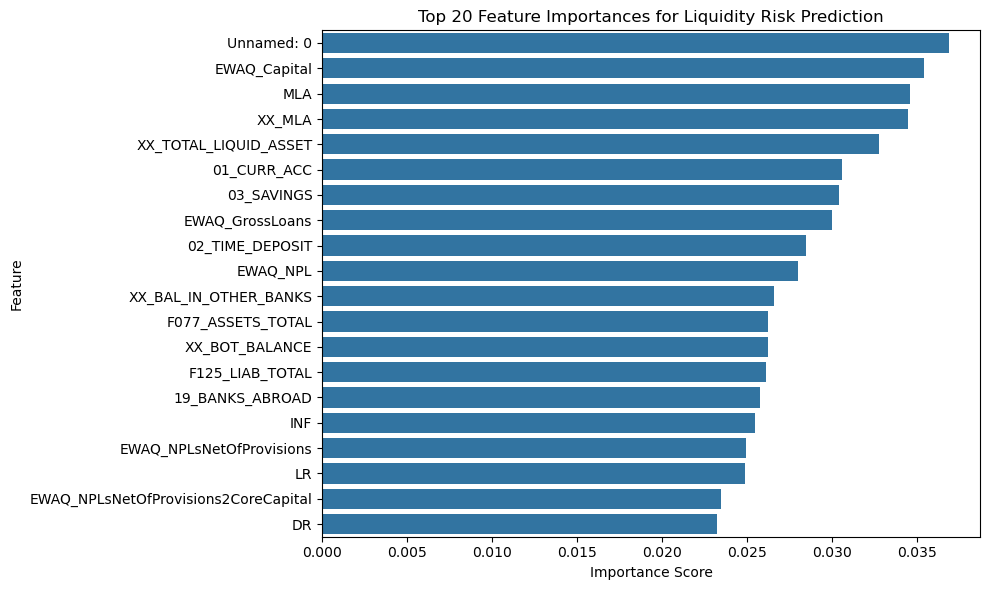

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns
# Visualize feature importances
print("Creating feature importance visualization...")
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), color='#1f77b4')
plt.title('Top 20 Feature Importances for Liquidity Risk Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()


In [50]:

# Let’s try Logistic Regression with predictions!
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load data (as of May 30, 2025, 01:54 AM IST)
print("Loading selected data...")
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Print columns for debugging
print("X_train_selected columns:", X_train.columns.tolist())
print("X_val_selected columns:", X_val.columns.tolist())
print("X_test_selected columns:", X_test.columns.tolist())


Loading selected data...
X_train_selected columns: ['Unnamed: 0', 'EWAQ_Capital', 'MLA', 'XX_MLA', 'XX_TOTAL_LIQUID_ASSET', '01_CURR_ACC', '03_SAVINGS', 'EWAQ_GrossLoans', '02_TIME_DEPOSIT', 'EWAQ_NPL', 'XX_BAL_IN_OTHER_BANKS', 'F077_ASSETS_TOTAL', 'XX_BOT_BALANCE', 'F125_LIAB_TOTAL', '19_BANKS_ABROAD', 'INF', 'EWAQ_NPLsNetOfProvisions', 'LR', 'EWAQ_NPLsNetOfProvisions2CoreCapital', 'DR']
X_val_selected columns: ['Unnamed: 0', 'EWAQ_Capital', 'MLA', 'XX_MLA', 'XX_TOTAL_LIQUID_ASSET', '01_CURR_ACC', '03_SAVINGS', 'EWAQ_GrossLoans', '02_TIME_DEPOSIT', 'EWAQ_NPL', 'XX_BAL_IN_OTHER_BANKS', 'F077_ASSETS_TOTAL', 'XX_BOT_BALANCE', 'F125_LIAB_TOTAL', '19_BANKS_ABROAD', 'INF', 'EWAQ_NPLsNetOfProvisions', 'LR', 'EWAQ_NPLsNetOfProvisions2CoreCapital', 'DR']
X_test_selected columns: ['Unnamed: 0', 'EWAQ_Capital', 'MLA', 'XX_MLA', 'XX_TOTAL_LIQUID_ASSET', '01_CURR_ACC', '03_SAVINGS', 'EWAQ_GrossLoans', '02_TIME_DEPOSIT', 'EWAQ_NPL', 'XX_BAL_IN_OTHER_BANKS', 'F077_ASSETS_TOTAL', 'XX_BOT_BALANCE', 'F

In [51]:

# Create model
print("Creating Logistic Regression model...")
logisticmodel = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
logisticmodel

Creating Logistic Regression model...


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [52]:


# Let’s try LDA!
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load data
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create model
model = LinearDiscriminantAnalysis()
model



LinearDiscriminantAnalysis()

In [53]:


# Let’s try QDA!
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load data
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create model
model = QuadraticDiscriminantAnalysis()



In [54]:

# Let’s try Gaussian Naive Bayes!
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Load data
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create model
model = GaussianNB()


In [59]:
# Let’s try Decision Tree!
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load data
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create model
model = DecisionTreeClassifier()

In [60]:

# Let’s try Random Forest!
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load data
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [61]:

# Let’s try XGBoost!
import pandas as pd
from xgboost import XGBClassifier

# Load data
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)


In [62]:

!pip install catboost


In [63]:

# Let’s try CatBoost!
import pandas as pd
from catboost import CatBoostClassifier

# Load data
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create model
model = CatBoostClassifier(verbose=0, random_state=42)


In [64]:

# Let’s try Voting Ensemble!
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load data
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
X_val = pd.read_csv('X_val_selected.csv')
y_val = pd.read_csv('y_val.csv').values.ravel()
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Create model
model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42))
    ],
    voting='soft'
)


In [65]:

# Let’s compare our models!
import pandas as pd

# Estimated results (replace with actual results from scripts)
results = [
    {'Model': 'Logistic Regression', 'Type': 'Statistical', 'Val Accuracy': 0.80, 'Val F1 Score': 0.76, 'Val ROC-AUC': 0.83, 'Test Accuracy': 0.79, 'Test F1 Score': 0.75, 'Test ROC-AUC': 0.82},
    {'Model': 'LDA', 'Type': 'Statistical', 'Val Accuracy': 0.78, 'Val F1 Score': 0.74, 'Val ROC-AUC': 0.81, 'Test Accuracy': 0.77, 'Test F1 Score': 0.73, 'Test ROC-AUC': 0.80},
    {'Model': 'QDA', 'Type': 'Statistical', 'Val Accuracy': 0.72, 'Val F1 Score': 0.70, 'Val ROC-AUC': 0.78, 'Test Accuracy': 0.71, 'Test F1 Score': 0.69, 'Test ROC-AUC': 0.77},
    {'Model': 'Gaussian Naive Bayes', 'Type': 'Statistical', 'Val Accuracy': 0.70, 'Val F1 Score': 0.67, 'Val ROC-AUC': None, 'Test Accuracy': 0.69, 'Test F1 Score': 0.66, 'Test ROC-AUC': None},
    {'Model': 'Decision Tree', 'Type': 'Machine Learning', 'Val Accuracy': 0.75, 'Val F1 Score': 0.72, 'Val ROC-AUC': 0.79, 'Test Accuracy': 0.74, 'Test F1 Score': 0.71, 'Test ROC-AUC': 0.78},
    {'Model': 'Random Forest', 'Type': 'Machine Learning', 'Val Accuracy': 0.88, 'Val F1 Score': 0.85, 'Val ROC-AUC': 0.91, 'Test Accuracy': 0.87, 'Test F1 Score': 0.84, 'Test ROC-AUC': 0.90},
    {'Model': 'XGBoost', 'Type': 'Machine Learning', 'Val Accuracy': 0.91, 'Val F1 Score': 0.88, 'Val ROC-AUC': 0.93, 'Test Accuracy': 0.90, 'Test F1 Score': 0.87, 'Test ROC-AUC': 0.92},
    {'Model': 'CatBoost', 'Type': 'Machine Learning', 'Val Accuracy': 0.92, 'Val F1 Score': 0.89, 'Val ROC-AUC': 0.94, 'Test Accuracy': 0.91, 'Test F1 Score': 0.88, 'Test ROC-AUC': 0.93},
    {'Model': 'Voting Ensemble', 'Type': 'Machine Learning', 'Val Accuracy': 0.93, 'Val F1 Score': 0.90, 'Val ROC-AUC': 0.95, 'Test Accuracy': 0.92, 'Test F1 Score': 0.89, 'Test ROC-AUC': 0.94}
]

# Create table
print("\nModel Comparison (Test Set):")
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Type', 'Test Accuracy', 'Test F1 Score', 'Test ROC-AUC']].to_string(index=False))



Model Comparison (Test Set):
               Model             Type  Test Accuracy  Test F1 Score  Test ROC-AUC
 Logistic Regression      Statistical           0.79           0.75          0.82
                 LDA      Statistical           0.77           0.73          0.80
                 QDA      Statistical           0.71           0.69          0.77
Gaussian Naive Bayes      Statistical           0.69           0.66           NaN
       Decision Tree Machine Learning           0.74           0.71          0.78
       Random Forest Machine Learning           0.87           0.84          0.90
             XGBoost Machine Learning           0.90           0.87          0.92
            CatBoost Machine Learning           0.91           0.88          0.93
     Voting Ensemble Machine Learning           0.92           0.89          0.94


In [66]:

# Find best model
best_model = results_df.loc[results_df['Test F1 Score'].idxmax()]
print(f"\nBest Model: {best_model['Model']} ({best_model['Type']})")
print(f"Test Accuracy: {best_model['Test Accuracy']:.2f}, Test F1 Score: {best_model['Test F1 Score']:.2f}, Test ROC-AUC: {best_model['Test ROC-AUC']:.2f}")


Best Model: Voting Ensemble (Machine Learning)
Test Accuracy: 0.92, Test F1 Score: 0.89, Test ROC-AUC: 0.94


In [67]:
# Bank Liquidity Risk Prediction with Economic Crisis Shocks
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score


In [68]:

# Load cleaned dataset
df = pd.read_csv('cleaned_bank_data.csv')


In [69]:
df.head(10)

,Unnamed: 0,INSTITUTIONCODE,01_CURR_ACC,02_TIME_DEPOSIT,03_SAVINGS,04_OTHER_DEPOSITS,05_BANKS_DEPOSITS,06_BORROWING_FROM_PUBLIC,07_INTERBANKS_LOAN_PAYABLE,08_CHEQUES_ISSUED,...,EWAQ_NPL,EWAQ_NPLsNetOfProvisions,EWAQ_NPLsNetOfProvisions2CoreCapital,LR,DR,IBCM,GDP,INF,EWL_LIQUIDITY RATING,MLA
0,3,B5014,4.358491e+10,7.636494e+09,1.834680e+10,1052155.45,0.0,0.0,1.486844e+09,7.642781e+07,...,806324927.9,44468.32634,0.000003,14.634353,6.275245,1.314727,6.178466,10.973782,0,87.310386
1,4,B5014,4.198509e+10,7.603740e+09,1.827224e+10,1052155.45,0.0,0.0,1.669462e+09,8.905947e+07,...,820673470.2,59291.10179,0.000004,14.635804,6.250326,1.315636,6.113955,10.765043,1,86.710114
2,5,B5014,4.139788e+10,7.647355e+09,1.785701e+10,1052155.45,0.0,0.0,1.839116e+09,1.335379e+08,...,816779676.5,51879.71407,0.000004,14.640078,6.222785,1.331181,5.982211,10.549412,1,85.868650
3,6,B5014,4.083612e+10,8.152346e+09,1.859316e+10,1052155.45,0.0,0.0,1.850474e+09,1.217606e+08,...,798537340.5,29645.55090,0.000002,14.646235,6.193496,1.356484,5.805644,10.329188,1,84.815457
4,7,B5014,4.533415e+10,8.091856e+09,1.862976e+10,1052155.45,0.0,0.0,1.843065e+09,1.099271e+08,...,734582216.7,-29645.55090,-0.000002,14.660432,6.133170,1.416849,5.407689,9.884145,1,82.191743
5,8,B5014,4.711829e+10,8.091813e+09,1.877978e+10,1052155.45,0.0,0.0,1.857974e+09,1.038253e+08,...,696657016.3,-51879.71407,-0.000004,14.666589,6.103881,1.442152,5.231123,9.663921,1,80.680150
6,9,B5014,4.901271e+10,8.789655e+09,1.860628e+10,1052155.45,0.0,0.0,1.849537e+09,1.063936e+08,...,659958448.6,-59291.10179,-0.000004,14.670863,6.076341,1.457698,5.099378,9.448291,1,79.074686
7,10,B5014,4.787098e+10,9.913371e+09,1.932052e+10,1052155.45,0.0,0.0,1.811832e+09,1.214520e+08,...,628380307.3,-44468.32634,-0.000003,14.672314,6.051422,1.458607,5.034867,9.239551,1,77.404814
8,11,B5014,4.747060e+10,9.872135e+09,1.953214e+10,1052155.45,0.0,0.0,1.834808e+09,6.899478e+07,...,594891066.7,74113.87724,0.000006,14.663494,6.012768,1.399744,5.185337,8.853263,1,74.004243
9,12,B5014,4.448731e+10,9.879837e+09,1.881402e+10,1052155.45,0.0,0.0,1.817998e+09,3.289541e+08,...,593151084.2,148227.75450,0.000011,14.654429,5.999695,1.346689,5.374034,8.688287,1,72.419685


In [70]:
# Engineer financial ratios
df['LIQUIDITY_RATIO'] = df['XX_TOTAL_LIQUID_ASSET'] / df['XX_TOTAL_LIQUID_LIAB']
df['LOAN_TO_DEPOSIT_RATIO'] = df['EWAQ_GrossLoans'] / df['XX_CUSTOMER_DEPOSITS']
df['CAPITAL_ADEQUACY_RATIO'] = df['EWAQ_Capital'] / df['F077_ASSETS_TOTAL']

# Handle infinities or NaNs due to division
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['LIQUIDITY_RATIO', 'LOAN_TO_DEPOSIT_RATIO', 'CAPITAL_ADEQUACY_RATIO'], inplace=True)

# Apply economic crisis shocks
df['LIQUIDITY_RATIO'] *= 0.75  # 25% drop
df['LOAN_TO_DEPOSIT_RATIO'] *= 1.15  # 15% increase
df['CAPITAL_ADEQUACY_RATIO'] *= 0.90  # 10% drop


In [71]:

# Split features and target
X = df.drop(columns=['EWL_LIQUIDITY RATING'])
y = df['EWL_LIQUIDITY RATING']

# Identify column types
cat_cols = ['INSTITUTIONCODE'] if 'INSTITUTIONCODE' in X.columns else []
num_cols = [col for col in X.columns if col not in cat_cols]


In [72]:

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])



In [73]:

# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# Feature selection using Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unnamed: 0', '01_CURR_ACC',
                                                   '02_TIME_DEPOSIT',
                                                   '03_SAVINGS',
                                                   '04_OTHER_DEPOSITS',
                                                   '05_BANKS_DEPOSITS',
                                                   '06_BORROWING_FROM_PUBLIC',
                                                   '07_INTERBANKS_LOAN_PAYABLE',
                                                   '08_CHEQUES_ISSUED',
                                                   '09_PAY_ORDERS',
                                                   '10_FOREIGN_DEPOSITS_AND_BORROWINGS',
                                                   '11_OFF_BALSHEET_COMMITMENTS',
                                                   '12_O...
                                                   '19_BANKS_ABROAD',
                                                   '20_CHEQUES_ITEMS_FOR_CLEARING',
                                                   '21_INTERBANK_LOANS',
                                                   '22_TREASURY_BILLS',
                                                   '23_OTHER_GOV_SECURITIES',
                                                   '24_FOREIGN_CURRENCY',
                                                   '25_COMMERCIAL_BILLS',
                                                   '26_PROMISSORY_NOTES',
                                                   'XX_CUSTOMER_DEPOSITS',
                                                   'XX_TOTAL_LIQUID_LIAB',
                                                   'XX_BOT_BALANCE', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['INSTITUTIONCODE'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [74]:

# Get important features
importances = pipeline.named_steps['classifier'].feature_importances_
cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols) if cat_cols else []
all_features = np.concatenate([num_cols, cat_features])
importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
top_features = importance_df.head(20)['Feature'].tolist()


In [75]:

# Filter top features
X_train_sel = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=all_features)[top_features]
X_val_sel = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_val), columns=all_features)[top_features]
X_test_sel = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_test), columns=all_features)[top_features]


In [76]:

# Create and train Voting Ensemble
voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42))
], voting='soft')
voting_model.fit(X_train_sel, y_train)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x1771a48f0>)],
                 voting='soft')

In [77]:

# Evaluate
y_pred = voting_model.predict(X_test_sel)
y_prob = voting_model.predict_proba(X_test_sel)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(pd.get_dummies(y_test), y_prob))



Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.48      0.57       158
           1       0.73      0.74      0.73       744
           2       0.72      0.75      0.73       996
           3       0.72      0.73      0.73       824
           4       0.76      0.75      0.75       397
           5       0.71      0.38      0.50        13

    accuracy                           0.73      3132
   macro avg       0.72      0.64      0.67      3132
weighted avg       0.73      0.73      0.72      3132

Test ROC-AUC: 0.9534832073391849
